In [156]:
import json
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow import keras
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns
from collections import Counter

### Read Data


In [4]:
with open(r'../data/json/closure.json', encoding='utf8', mode='r') as f:
    data = json.load(f)


### Extract Data Feature


In [133]:
CognitiveData_Cold = []
CognitiveData_Hot = []
CognitiveData = []
for i in data.keys():
    temp = list(data[i]['cognitiveData_Cold'].values())
    temp_hot = list(data[i]['cognitiveData_Hot'].values())
    CognitiveData_Cold.append(temp)
    CognitiveData_Hot.append(temp_hot)
    temp.extend(temp_hot)
    CognitiveData.append(temp)
CognitiveData_Cold = np.array(CognitiveData_Cold)
CognitiveData_Hot = np.array(CognitiveData_Hot)
CognitiveData = np.array(CognitiveData)
CognitiveData.shape


(103, 14)

In [6]:
All_data = []
All_keys = []
for i in data.keys():
    temp = []
    for j in data[i].keys():
        try:
            for k in data[i][j].keys():
                if j+"_"+k not in All_keys:
                    All_keys.append(j+"_"+k)
            for x in data[i][j].values():
                temp.append(x)
        except AttributeError:
            temp.append(data[i][j])
            if j not in All_keys:
                    All_keys.append(j)
    All_data.append(temp)
All_data = np.array(All_data)
All_keys = np.array(All_keys)
All_data.shape

(103, 70)

### Model


##### Kmeans

In [134]:
for i in range(len(CognitiveData_Cold)):
    for j in range(0,len(CognitiveData_Hot[i]),2):
        CognitiveData_Hot[i,j] *= 10

In [135]:
for i in range(len(CognitiveData_Cold)):
    for j in range(0,len(CognitiveData_Cold[i]),2):
        CognitiveData_Cold[i,j] *= 10

In [138]:
kmeans_CognitiveData_Cold = KMeans(n_clusters=2, random_state=0).fit(CognitiveData_Cold)
kmeans_CognitiveData_Hot = KMeans(n_clusters=2, random_state=0).fit(CognitiveData_Hot)
kmeans_CognitiveData = KMeans(n_clusters=2, random_state=0).fit(CognitiveData)

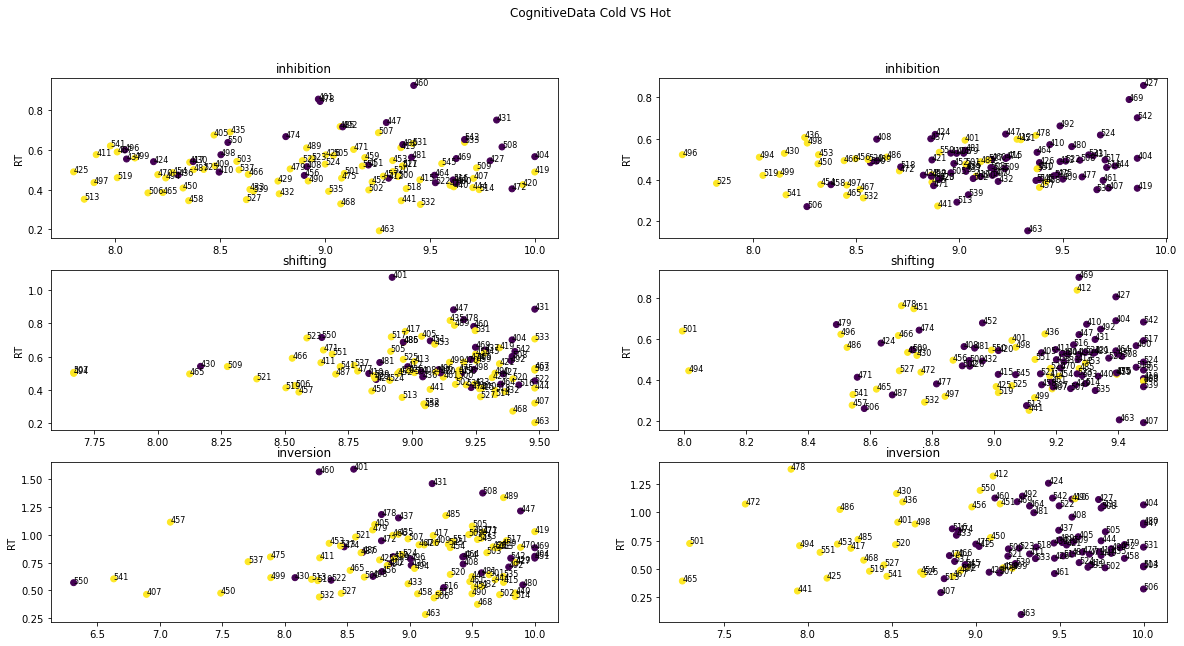

In [139]:
title = ['inhibition', 'shifting', 'inversion']
index = [x for x in data.keys()]
plt.figure(figsize=(20, 10))
plt.suptitle("CognitiveData Cold VS Hot")
for i in range(0, 6, 2):
    plt.subplot(3, 2, i+1)
    plt.title(title[int((i+1)/2)])
    plt.ylabel("RT")
    plt.scatter(CognitiveData_Cold[:, i], CognitiveData_Cold[:,i+1], c = kmeans_CognitiveData_Cold.labels_)
    for j in range(len(index)):
        plt.annotate(index[j], xy = (CognitiveData_Cold[:, i][j],CognitiveData_Cold[:,i+1][j]), size=8 )
    plt.subplot(3, 2, i+2)
    plt.title(title[int((i+1)/2)])
    plt.ylabel("RT")
    plt.scatter(CognitiveData_Hot[:, i], CognitiveData_Hot[:,i+1], c = kmeans_CognitiveData_Hot.labels_)
    for j in range(len(index)):
        plt.annotate(index[j], xy = (CognitiveData_Hot[:, i][j], CognitiveData_Hot[:,i+1][j]), size=8 )

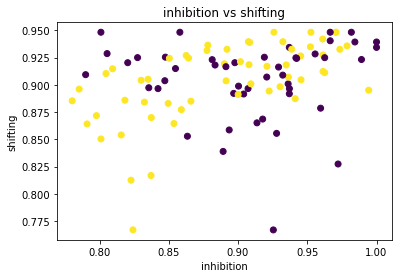

In [50]:
plt.title("inhibition vs shifting")
plt.xlabel("inhibition")
plt.ylabel("shifting")
plt.scatter(CognitiveData_Cold[:, 0], CognitiveData_Cold[:,
            2], c=kmeans_CognitiveData_Cold.labels_)


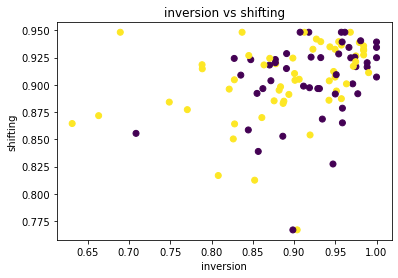

In [51]:
plt.title("inversion vs shifting")
plt.xlabel("inversion")
plt.ylabel("shifting")
plt.scatter(CognitiveData_Cold[:, 4], CognitiveData_Cold[:,2], c=kmeans_CognitiveData_Cold.labels_)


##### Correlation Coefficient Matrix

<AxesSubplot:>

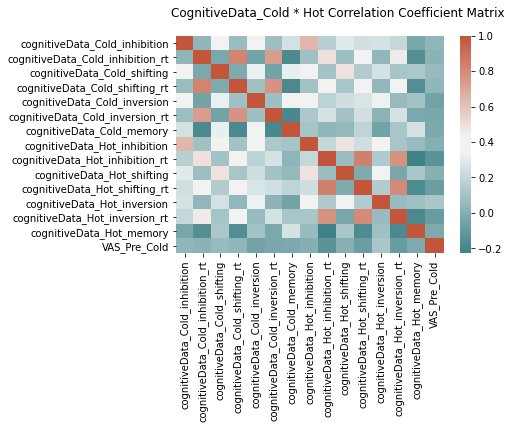

In [112]:
temp = All_data[:,:15]
# label = [x for x in data["401"]['cognitiveData_Cold'].keys()]*2 + ["VAS_Pre_Cold"]
cmap = sns.diverging_palette(200, 20, sep=20, as_cmap=True)
plt.suptitle("CognitiveData_Cold * Hot Correlation Coefficient Matrix")
sns.heatmap(np.corrcoef(temp.T), xticklabels = All_keys[:15], yticklabels = All_keys[:15],cmap=cmap)

<AxesSubplot:>

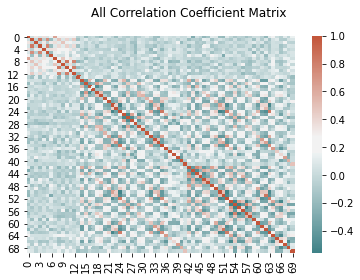

In [113]:
plt.suptitle("All Correlation Coefficient Matrix")
sns.heatmap(np.corrcoef(All_data.T),cmap=cmap)

<AxesSubplot:>

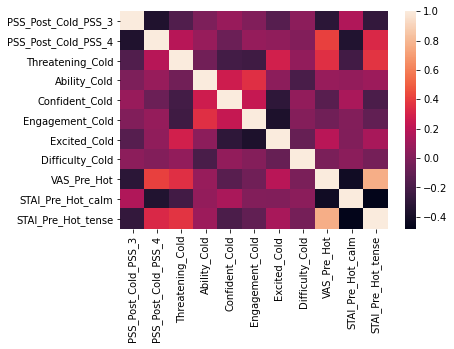

In [118]:
sns.heatmap(np.corrcoef(All_data[:,34:45].T), xticklabels = All_keys[34:45], yticklabels = All_keys[34:45])

##### PIE

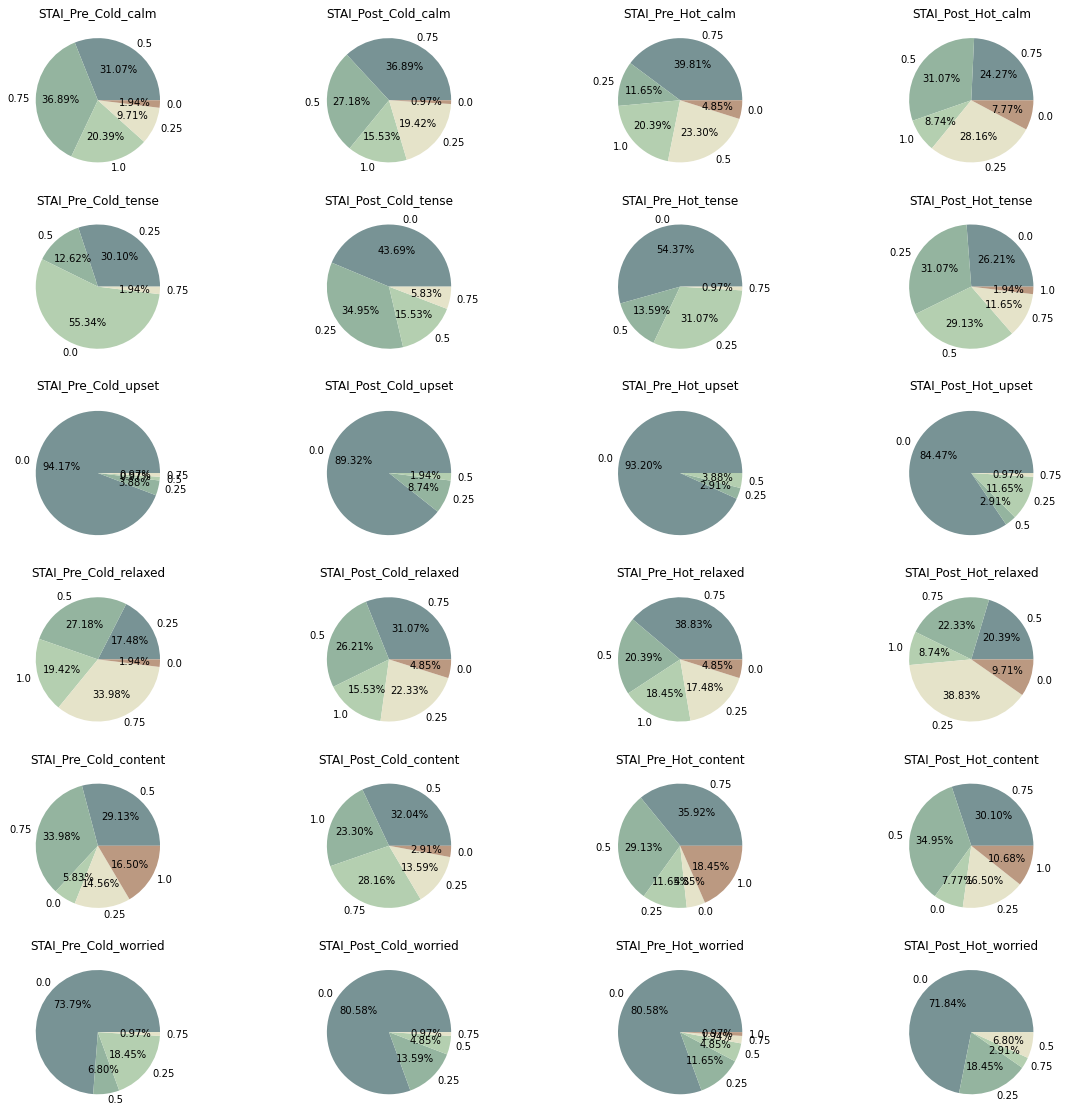

In [140]:
def draw_pie(bias,i,pos,cmap):
    plt.subplot(6,4,i*4+pos)
    plt.title(All_keys[15+bias])
    plt.pie(Counter(All_data[:,15+bias]).values(),
    labels = Counter(All_data[:,15+bias]).keys(),
    autopct='%.2f%%',
    colors = ["#789395","#94B49F","#B4CFB0","#E5E3C9","#BB9981"])

temp_bias = [0, 11, 11+17, 11*2+17]
plt.figure(figsize=(20,20))
cmap = mpl.cm.cool
for i in range(6):
    for j in range(4):
        draw_pie(temp_bias[j]+i,i,j+1,cmap)
plt.show()

##### (memory_cold-memory_hot / [(VAS_post_cold - VAS_pre_cold) - (VAS_post_hot - VAS_pre_hot)])

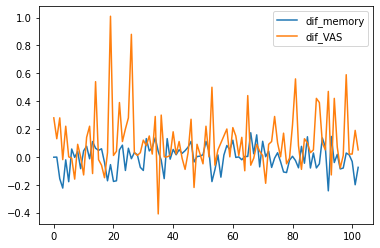

In [178]:
dif_memory = All_data[:,6]-All_data[:,7]
dif_VAS = (All_data[:,14]-All_data[:,14+11]) - (All_data[:,14+11+17]-All_data[:,14+11+17+11])
plt.plot(dif_memory)
plt.plot(dif_VAS)
plt.legend(["dif_memory","dif_VAS"])

Text(0, 0.5, 'dif_VAS')

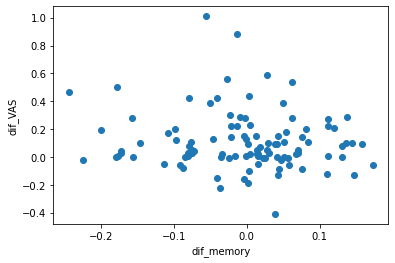

In [182]:
plt.scatter(dif_memory,dif_VAS)
plt.xlabel("dif_memory")
plt.ylabel("dif_VAS")

### ML Methods

##### Construct Data

In [105]:
all_cold_data = All_data[:,0:7]
# all_cold_data = np.hstack((all_cold_data,All_data[:,14:70-28]))
all_hot_data = All_data[:,7:14]
# all_hot_data = np.hstack((all_hot_data,All_data[:,70-28:]))
all_cold_data.shape

(103, 7)

In [106]:
label_hot = np.ones(103)
label_cold = np.zeros(103)
label = np.hstack((label_cold,label_hot))
label_nn = keras.utils.to_categorical(label)
label.shape

(206,)

In [122]:
X = np.vstack((all_cold_data, all_hot_data))
y = np.hstack((label_cold, label_hot))
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=True)
# X_train, X_test, y_train, y_test = train_test_split(X,label_nn,shuffle=True)

##### LR

In [36]:
# ALL feature
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X_train):
    model_LR = LogisticRegression().fit(X_train[train_index],y_train[train_index])
    print("acc"+str(i)+":",model_LR.score(X_train[test_index],y_train[test_index]))
    i += 1
print("acc_test:",model_LR.score(X_test, y_test))

acc0: 0.5
acc1: 0.375
acc2: 0.5625
acc3: 0.5
acc4: 0.7333333333333333
acc5: 0.4666666666666667
acc6: 0.4666666666666667
acc7: 0.6666666666666666
acc8: 0.7333333333333333
acc9: 0.7333333333333333
acc_test: 0.5769230769230769


In [57]:
# Cognitive
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X_train):
    model_LR = LogisticRegression(penalty="l2").fit(X_train[train_index],y_train[train_index])
    print("acc"+str(i)+":",model_LR.score(X_train[test_index],y_train[test_index]))
    i += 1
print("acc_test:",model_LR.score(X_test, y_test))

acc0: 0.75
acc1: 0.5
acc2: 0.5625
acc3: 0.625
acc4: 0.3333333333333333
acc5: 0.4666666666666667
acc6: 0.5333333333333333
acc7: 0.6666666666666666
acc8: 0.5333333333333333
acc9: 0.4666666666666667
acc_test: 0.6346153846153846


##### SVC

In [67]:
# ALL feature
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X_train):
    model_SVM = SVC(kernel="linear").fit(X_train[train_index],y_train[train_index])
    print("acc"+str(i)+":",model_SVM.score(X_train[test_index],y_train[test_index]))
    i += 1
print("acc_test:",model_SVM.score(X_test, y_test))

acc0: 0.625
acc1: 0.3125
acc2: 0.625
acc3: 0.6875
acc4: 0.4666666666666667
acc5: 0.6
acc6: 0.4666666666666667
acc7: 0.3333333333333333
acc8: 0.6666666666666666
acc9: 0.5333333333333333
acc_test: 0.5576923076923077


In [63]:
# Cognitive
kf = KFold(n_splits=10)
i = 0
for train_index, test_index in kf.split(X_train):
    model_SVM = SVC(kernel="rbf").fit(X_train[train_index],y_train[train_index])
    print("acc"+str(i)+":",model_SVM.score(X_train[test_index],y_train[test_index]))
    i += 1
print("acc_test:",model_SVM.score(X_test, y_test))

acc0: 0.8125
acc1: 0.5
acc2: 0.5625
acc3: 0.4375
acc4: 0.4
acc5: 0.4
acc6: 0.6
acc7: 0.6
acc8: 0.4666666666666667
acc9: 0.4666666666666667
acc_test: 0.6923076923076923


##### DNN

Train on 154 samples, validate on 52 samples
Epoch 1/100
154/154 [==============================] - 0s 2ms/step - loss: 0.6942 - acc: 0.5325 - val_loss: 0.6821 - val_acc: 0.5769
Epoch 2/100
154/154 [==============================] - 0s 278us/step - loss: 0.6911 - acc: 0.5519 - val_loss: 0.6861 - val_acc: 0.6346
Epoch 3/100
154/154 [==============================] - 0s 291us/step - loss: 0.6892 - acc: 0.5325 - val_loss: 0.6883 - val_acc: 0.5769
Epoch 4/100
154/154 [==============================] - 0s 421us/step - loss: 0.6880 - acc: 0.5325 - val_loss: 0.6895 - val_acc: 0.5385
Epoch 5/100
154/154 [==============================] - 0s 356us/step - loss: 0.6865 - acc: 0.5584 - val_loss: 0.6896 - val_acc: 0.5385
Epoch 6/100
154/154 [==============================] - 0s 432us/step - loss: 0.6855 - acc: 0.5779 - val_loss: 0.6910 - val_acc: 0.5192
Epoch 7/100
154/154 [==============================] - 0s 365us/step - loss: 0.6842 - acc: 0.5779 - val_loss: 0.6920 - val_acc: 0.5000
Epoch 8/100


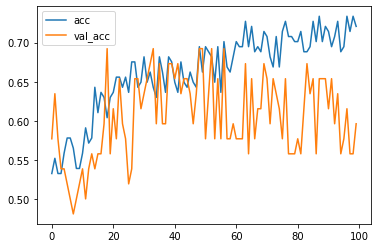

In [84]:
# ALL_data
model = Sequential()
model.add(Dense(32,activation="relu"))
model.add(Dense(2,activation="sigmoid"))

model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer='sgd',
                metrics=["accuracy"])

history = model.fit(X_train,y_train,batch_size=3,epochs=100,verbose=1,validation_data=(X_test,y_test))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.show()

Train on 154 samples, validate on 52 samples
Epoch 1/100
154/154 [==============================] - 1s 4ms/step - loss: 0.7110 - acc: 0.4935 - val_loss: 0.6954 - val_acc: 0.5192
Epoch 2/100
154/154 [==============================] - 0s 298us/step - loss: 0.6987 - acc: 0.4935 - val_loss: 0.6918 - val_acc: 0.5192
Epoch 3/100
154/154 [==============================] - 0s 324us/step - loss: 0.6938 - acc: 0.4935 - val_loss: 0.6906 - val_acc: 0.5000
Epoch 4/100
154/154 [==============================] - 0s 363us/step - loss: 0.6915 - acc: 0.5000 - val_loss: 0.6902 - val_acc: 0.5000
Epoch 5/100
154/154 [==============================] - 0s 330us/step - loss: 0.6902 - acc: 0.5195 - val_loss: 0.6901 - val_acc: 0.5000
Epoch 6/100
154/154 [==============================] - 0s 426us/step - loss: 0.6893 - acc: 0.5584 - val_loss: 0.6902 - val_acc: 0.5385
Epoch 7/100
154/154 [==============================] - 0s 356us/step - loss: 0.6878 - acc: 0.6234 - val_loss: 0.6902 - val_acc: 0.5385
Epoch 8/100


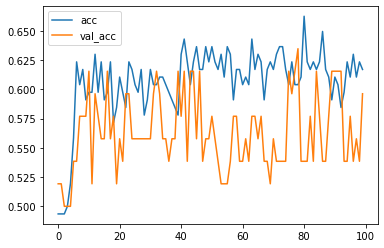

In [108]:
# Cognitive
model = Sequential()
model.add(Dense(32,activation="relu"))
model.add(Dense(2,activation="sigmoid"))

model.compile(loss = keras.losses.categorical_crossentropy,
                optimizer='sgd',
                metrics=["accuracy"])

history = model.fit(X_train,y_train,batch_size=3,epochs=100,verbose=1,validation_data=(X_test,y_test))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_acc'])
plt.show()

##### DecisionTree

In [123]:
i = 0
for train_index, test_index in kf.split(X_train):
    model_tree = tree.DecisionTreeClassifier().fit(X_train[train_index],y_train[train_index])
    print("acc"+str(i)+":",model_tree.score(X_train[test_index],y_train[test_index]))
    i += 1

acc0: 0.4375
acc1: 0.375
acc2: 0.5625
acc3: 0.5
acc4: 0.5333333333333333
acc5: 0.8
acc6: 0.4666666666666667
acc7: 0.6
acc8: 0.5333333333333333
acc9: 0.6


In [ ]:
temp_bias = [0, 11, 11+17, 11*2+17]
for i in range(6):
    for j in range(4):
        print(All_data[:,15+temp_bias[j]])

In [143]:
All_data.shape

(103, 70)

##### t-SNE

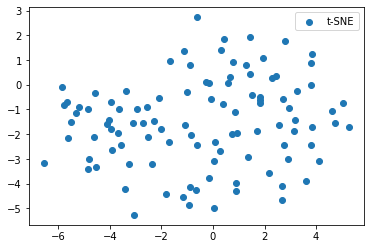

In [161]:
X_tsne = TSNE(n_components=2,random_state=33).fit_transform(All_data[:,15:])
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],label="t-SNE")
plt.legend()

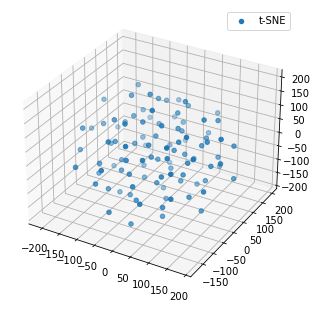

In [162]:
X_tsne = TSNE(n_components=3,random_state=0).fit_transform(All_data[:,15:])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:, 2],label="t-SNE")
plt.legend()
plt.show()

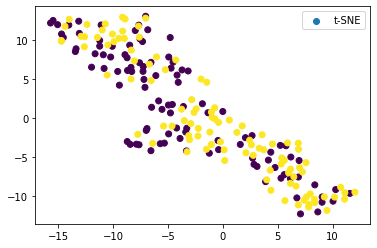

In [154]:
X_tsne = TSNE(n_components=2,random_state=0).fit_transform(X)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],c = y,label="t-SNE")
plt.legend()

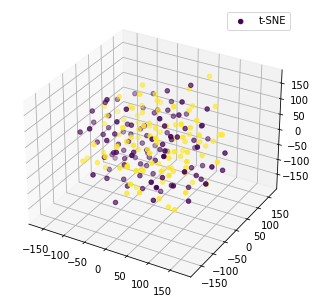

In [158]:
X_tsne = TSNE(n_components=3,random_state=0).fit_transform(X)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X_tsne[:, 0], X_tsne[:, 1],X_tsne[:, 2],c = y,label="t-SNE")
plt.legend()
plt.show()

In [149]:
X.shape

(206, 7)